# 연도 별 국내 복지시설 현황

오류설정 및 한글 폰트 설정

In [7]:
import csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 설정
plt.rcParams['axes.unicode_minus'] = False

csv 불러오기

In [4]:
with open("..\데이터\아동복지시설수_및_보호아동현황__시도별_20241122115745.csv", encoding='cp949') as f:
    data = csv.reader(f) # 헤더 스킵

    data_array = [] 

    for row in data: # csv 데이터의 한 행을 row에 삽입
        data_array.append(row)
        print(row)


['행정구역별(1)', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019']
['행정구역별(1)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)']
['전국', '280', '6188', '6655', '17119', '280', '5870', '6478', '16523', '281', '5427', '6034', '15916', '281', '4401', '5048', '15239', '278', '4822', '5431', '14630

*range 설정 오류 발생

['행정구역별(1)', '2010', '2010', '2010', '2010', '2011', '2011', '2011', '2011', '2012', '2012', '2012', '2012', '2013', '2013', '2013', '2013', '2014', '2014', '2014', '2014', '2015', '2015', '2015', '2015', '2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017', '2018', '2018', '2018', '2018', '2019', '2019', '2019', '2019']
['행정구역별(1)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)', '시설수 (개)', '입소자 (명)', '퇴소자 (명)', '연말현재 수용자 (명)']
['전국', '280', '6188', '6655', '17119', '280', '5870', '6478', '16523', '281', '5427', '6034', '15916', '281', '4401', '5048', '15239', '278', '4822', '5431', '14630

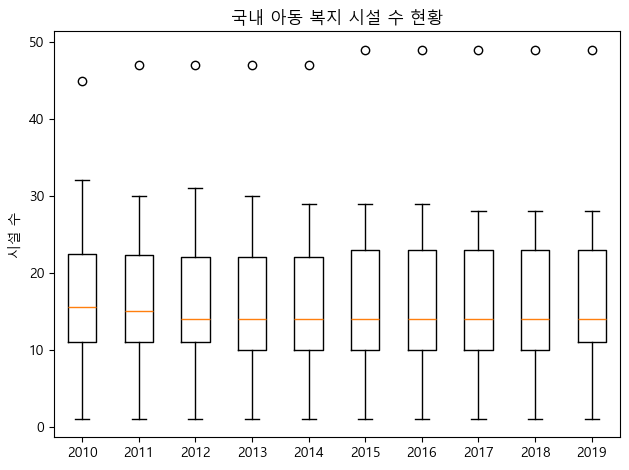

In [20]:
import csv
import matplotlib.pyplot as plt

# 데이터 전처리
data_array = []  # 전체 데이터를 저장할 배열
facilitycount = []  # 시설 수를 연도별로 저장할 배열 ex) 0행은 2010년, 1행은 2011년..
years = [2010 + i for i in range(10)]  # xlabel 연도설정용도

with open("..\데이터\아동복지시설수_및_보호아동현황__시도별_20241122115745.csv", encoding='cp949') as f:  # 경로지정
    data = csv.reader(f)

    for row in data:  # csv 데이터의 한 행을 row에 삽입
        data_array.append(row)  # 행으로 받은 row를 data_array에 집어넣음으로써 2차원 배열 data_array생성

    for i in range(1, min(len(data_array[0]), 45), 4):  # '시설수'열 이 존재하는 1열, 5열, 9열....을 지정하기 위해 range사용
        inner = []
        for j in range(len(data_array)):  # 행 개수
            if data_array[j][i] != '-':  # 값이 비어 있지 않은 경우
                try:
                    value = int(data_array[j][i])  # 정수로 변환
                    if value < 100:  # 지역 별 시설 수 데이터는 100이 넘지 않음을 확인 후 조건 생성
                        inner.append(value)  # inner에 데이터 저장
                except ValueError:
                    pass  # 변환 실패 시 무시
        if len(inner) in [16, 17]:  # 세종특별자치시의 경우 2010년 시설이 없다가 후에 추가되었기에 inner의 개수가 16인 경우도 가능케함.
            facilitycount.append(inner)

# 박스플롯 그리기
for i in data_array:
    print(i)

for i in facilitycount:
    print(i)

plt.boxplot(facilitycount)  # 지역별 데이터
plt.title("국내 아동 복지 시설 수 현황")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)
plt.ylabel("시설 수")
plt.tight_layout()
plt.show()


 - 서울특별시의 경우 이상치로 인식되는 결과 발생 -> 서울시에 시설이 가장 많다는 의미(이상치에 '서울'이라는 라벨을 달수있으면 좋을듯)
 - 국내 시설 수의 중앙값은 10개 초반에 분포함을 알 수 있음.

['시설별(1)', '시설별(2)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)', '시설수 (개소)', '입소정원 (명)']
['노인주거복지시설', '양로시설', '272', '13903', '265', '13446', '265', '13283', '252', '12562', '238', '12510', '232', '13036', '209', '11619', '192', '9962', '180', '9752', '175', '9653']
['노인주거복지시설', '노인공동생활가정', '142', '1173', '131', '1087', '128', '1062', '119', '1092', '117', '998', '115', '954', '107', '953', '107', '930', '89', '763', '82', '710']
['노인주거복지시설', '노인복지주택', '29', '5034', '31', '5376', '32', '5648', '33', '5998', '35', '6389', '35', '7684', '36', '7925', '38', '8491', '39', '8840', '40', '9006']
['노인의료복지시설', '노인요양시설', '2707', '132387', '2933', '141479', '3136', '150025', '3261', '153785', '3390', '160594', '3595', '174015', '3844', '186289', '4057', '199134', '4346', '216784', '4525', '228495']
['노인의료복지시설', '노인요양공동생활가정', '

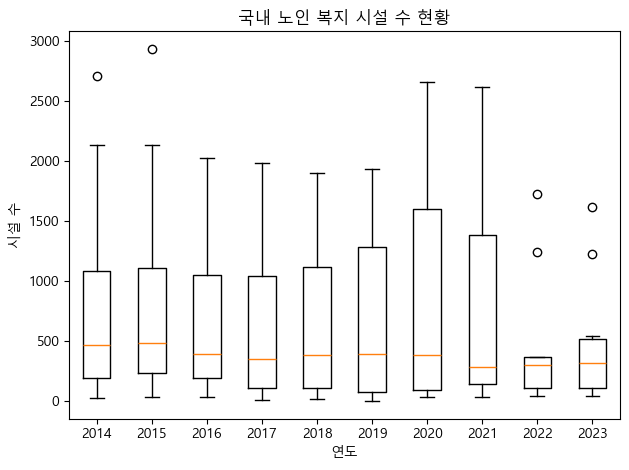

In [38]:
import csv
import matplotlib.pyplot as plt

# 데이터 전처리
data_array = []  # 전체 데이터를 저장할 배열
facilitycount = []  # 시설 수를 연도별로 저장할 배열
years = [2014 + i for i in range(10)]  # 연도 리스트 생성

with open("C:\\DaTeam\\2024-DA-Team\데이터\\노인복지_생활시설_수_및_생활현황_20241122115611.csv", encoding='cp949') as f:  # 경로 지정
    data = csv.reader(f)
    next(data)  # 헤더 건너뜀

    for row in data:
        # '소계' 행은 건너뛰기
        if row[1] == '소계':
            continue
        data_array.append(row)  # 조건을 통과한 행만 저장
        
    for i in range(2, min(len(data_array[0]), 22), 2):  # '시설수' 열을 지정하는 1열, 5열, 9열 등을 탐색
        inner = []
        for j in range(len(data_array)):  # 행 개수
            if data_array[j][i] != '-':  # 값이 비어 있지 않은 경우
                try:
                    value = int(data_array[j][i])  # 정수로 변환
                    if value < 3000:  # 시설 수 데이터가 3000을 넘지 않을 경우만 저장
                        inner.append(value)
                except ValueError:
                    pass  # 변환 실패 시 무시
        if len(inner) in range(9,15):  # 특정 복지지자치의 경우 시설이 없는 경우도 포함
            facilitycount.append(inner)

# 결과 확인
for i in data_array:
    print(i)

# 박스플롯 생성
plt.boxplot(facilitycount)
plt.title("국내 노인 복지 시설 수 현황")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)
plt.xlabel("연도")
plt.ylabel("시설 수")
plt.tight_layout()
plt.show()


* '경로당' 데이터가 편차가 너무 커 그래프에 담을 수 없는 문제가 발생함

['노인여가복지시설', '경로당', '63960', '0', '64568', '0', '65044', '-', '65604', '-', '66286', '-', '66737', '-', '67316', '0', '67211', '0', '68180', '0', '68792', '0']


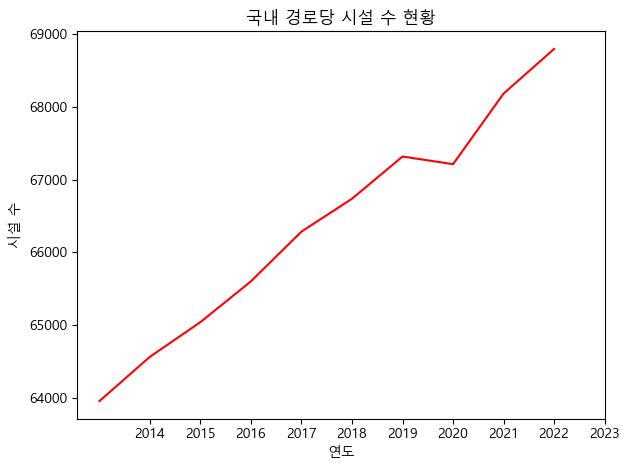

In [ ]:
import csv
import matplotlib.pyplot as plt

# 데이터 전처리  
facilitycount = []  # 시설 수를 연도별로 저장할 배열
data_array = []
years = [2014 + i for i in range(10)]  # 연도 리스트 생성

with open("C:\\DaTeam\\2024-DA-Team\데이터\\노인복지_생활시설_수_및_생활현황_20241122115611.csv", encoding='cp949') as f:  # 경로 지정
    data = csv.reader(f)
    next(data)  # 헤더 건너뜀

    for row in data:
        # '소계' 행은 건너뛰기
        if row[1] != '경로당':
            continue
        else:
            data_array.append(row)  # 조건을 통과한 행만 저장   

# 결과 확인
for i in data_array:
    print(i)

facilitycount = i[2:]
facilitycount = facilitycount[::2]
facilitycount = [int(value) for value in facilitycount]




plt.plot(facilitycount, color = 'red')
plt.title("국내 경로당 시설 수 현황")
plt.xticks(ticks=range(1, len(years) + 1), labels=years)
plt.xlabel("연도")
plt.ylabel("시설 수")
plt.tight_layout()
plt.show()


- 해가 갈수록 경로당 시설 수가 증가함을 알 수 있음 
- 고령화의 심각성을 체감하게됨